In [76]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

## Q1

In [15]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [18]:
df_p = df.loc[df['상권업종소분류명'] == '약국']

In [23]:
df_g = df_p.groupby('시도명').size()

In [44]:
df_g.sort_values(ascending=False)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
dtype: int64

## Q2

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임이 df라는 이름으로 존재한다고 가정

# 병원, 약국, 동물병원 필터링
hospital_pharmacy = df[df['상권업종소분류명'] =='동물병원']


In [35]:
hospital_pharmacy['상권업종소분류명'].value_counts()

상권업종소분류명
동물병원    3098
Name: count, dtype: int64

In [40]:
df_hg = hospital_pharmacy.groupby('시도명').size()

In [43]:
df_hg.sort_values(ascending=False)

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
전라남도        77
대전광역시       77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
dtype: int64

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'  # Windows 시스템의 경우
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

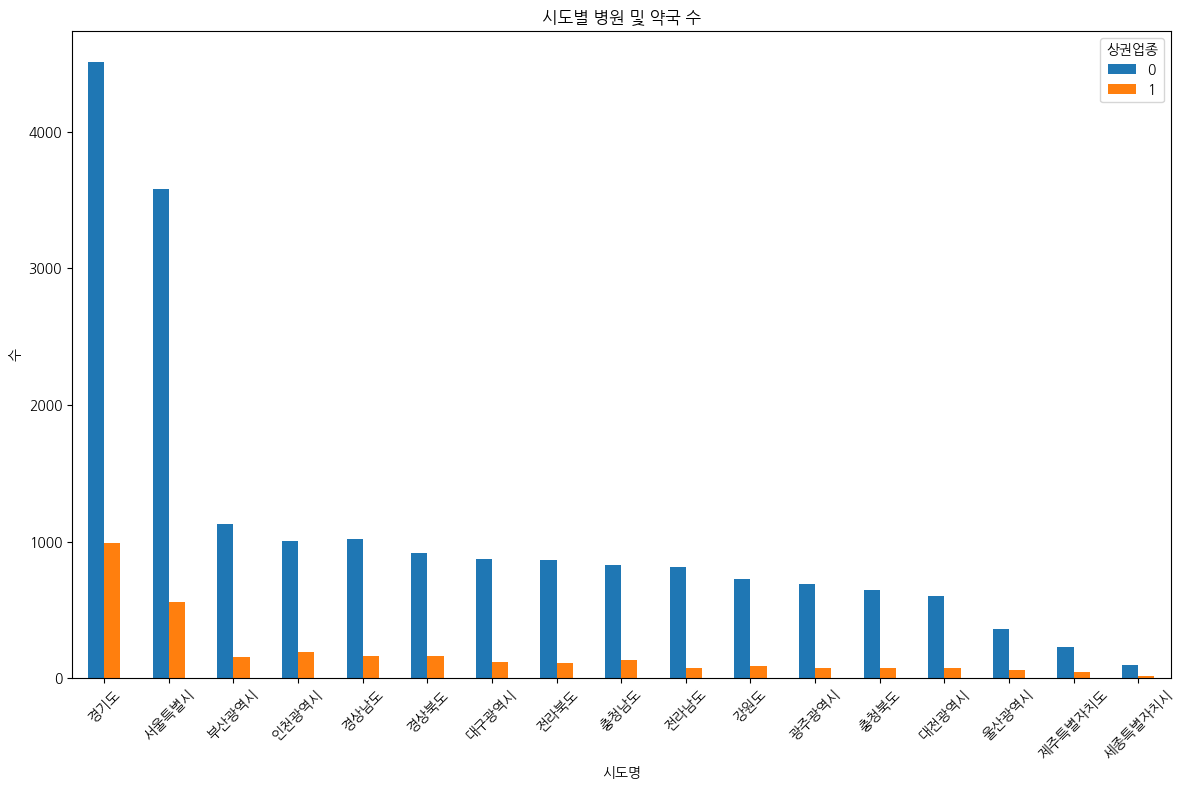

In [49]:
# 두 데이터프레임을 하나로 합치기
df_combined = pd.concat([df_g, df_hg], axis=1)
df_combined['총합'] = df_combined.sum(axis=1)
df_combined = df_combined.sort_values(by='총합', ascending=False).drop(columns='총합')
# 시각화
df_combined.plot(kind='bar', figsize=(12, 8))
plt.title('시도별 병원 및 약국 수')
plt.xlabel('시도명')
plt.ylabel('수')
plt.xticks(rotation=45)
plt.legend(title='상권업종')
plt.tight_layout()
plt.show()

## Q3

In [65]:
df = df[(df['시도명'] == '서울특별시') & (df['상권업종중분류명'] == '병원')]

In [66]:
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144


In [67]:
skin_df = df[df['상권업종소분류명'].str.contains('피부|성형')]
skin_df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
44,20912401,아미가성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010100109020001015305,원등빌딩,서울특별시 서초구 방배로20길 4,137060.0,6664.0,NaN,3,NaN,126.995334,37.485498


In [68]:
skin_df_v = skin_df['시군구명'].value_counts()

In [69]:
skin_df_v

시군구명
강남구     603
서초구     200
송파구      48
마포구      40
영등포구     39
강서구      38
광진구      37
강동구      37
중구       31
은평구      31
서대문구     29
성북구      28
동대문구     27
양천구      26
노원구      26
중랑구      21
성동구      17
구로구      17
관악구      17
동작구      14
강북구      12
종로구      11
용산구      10
금천구       9
도봉구       5
Name: count, dtype: int64

In [70]:
total_df_v = df['시군구명'].value_counts()
total_df_v

시군구명
강남구     2550
서초구     1196
송파구      748
동대문구     644
광진구      600
강서구      579
영등포구     516
은평구      506
노원구      503
강동구      494
성북구      470
마포구      456
중구       423
양천구      398
관악구      395
서대문구     379
종로구      343
동작구      342
성동구      339
중랑구      307
구로구      289
도봉구      275
강북구      259
용산구      222
금천구      173
Name: count, dtype: int64

In [73]:
ratio = (skin_df_v / total_df_v).round(2)
ratio_sorted = ratio.sort_values(ascending=False)

In [74]:
ratio_sorted

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64

## Q4

In [75]:
!pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ------------------------------------- -- 102.4/108.4 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 83.9/83.9 kB 4.6 MB/s eta 0:00:00


In [78]:
import folium

sliver_hospitals = df[df['상권업종소분류명'].str.contains('노인|치매')]
sliver_hospitals.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689


In [89]:
m = folium.Map(location=[37.5, 127], zoom_start=12)

In [90]:
m

In [94]:
for n in sliver_hospitals.index:
    name = sliver_hospitals.loc[n, "상호명"]
    address = sliver_hospitals.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [sliver_hospitals.loc[n, "위도"], sliver_hospitals.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(m)
m